In [2]:
import datetime
from sklearn_utils.utils import SkUtilsIO,filter_by_label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [5]:
X, y = SkUtilsIO('BC.csv').from_csv(
    label_column='stage')
y = ['healthy' if i == 'h' else 'bc' for i in y]

In [32]:
new_y = []
for item in y:
    if item == "bc":
        new_y.append(1)
    else:
        new_y.append(0)
np_y_new = np.array(new_y)
print(type(X))

<class 'list'>


In [43]:
X_df = pd.read_excel('regular_analysis.xlsx')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.nan_to_num(X_df), y, test_size=0.1, random_state=42)

Logistic Regression

In [10]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression(C=0.3e-6)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
# logreg.fit(X_train, y_train)
y_pred = logreg_cv.predict(X_test)
kf = StratifiedKFold(n_splits=10)
# scores = cross_val_score(logreg, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1')
log_scores = cross_val_score(logreg_cv, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1_micro')
print('kfold test: %s' % log_scores)
print('mean: %s' % log_scores.mean().round(3))
print('std: %s' % log_scores.std().round(3))

kfold test: [0.90909091 0.90909091 0.86363636 0.90909091 0.95454545 0.95454545
 0.9047619  0.95238095 0.8        0.9       ]
mean: 0.906
std: 0.045


Random Forest

In [11]:
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(X_train, y_train)
kf = StratifiedKFold(n_splits=10)
rf_scores = cross_val_score(rf, np.nan_to_num(X_df), np_y_new, cv=kf, scoring='f1_micro')
print('kfold test: %s' % rf_scores)
print('mean: %s' % rf_scores.mean().round(3))
print('std: %s' % rf_scores.std().round(3))

kfold test: [0.90909091 0.81818182 0.86363636 0.95454545 0.81818182 0.95454545
 0.95238095 1.         0.95       1.        ]
mean: 0.922
std: 0.064


SVM

In [12]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
kf = StratifiedKFold(n_splits=10)
svm_scores = cross_val_score(svm, np.nan_to_num(X_df), y, cv=kf, scoring='f1_micro')
print('kfold test: %s' % svm_scores)
print('mean: %s' % svm_scores.mean().round(3))
print('std: %s' % svm_scores.std().round(3))

kfold test: [0.63636364 0.63636364 0.63636364 0.63636364 0.63636364 0.63636364
 0.66666667 0.66666667 0.65       0.65      ]
mean: 0.645
std: 0.012


In [13]:
df = pd.DataFrame({'classifiers': ['logreg', 'rf', 'svm'], 'mean': [log_scores.mean().round(3), rf_scores.mean().round(3),svm_scores.mean().round(3)]})
ax = df.plot.bar(x='classifiers', y='mean', rot=0)
df.sort_values('mean', ascending=False)
df.to_excel('regular_test.xlsx')

In [14]:
kf = StratifiedKFold(n_splits=10, random_state=43)
logreg = LogisticRegression(C=0.3e-6)
logreg_cv_split = GridSearchCV(logreg, param_grid, cv=5)
logreg_results = []
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = logreg_cv_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        logreg_results.append(classification_report(clf.predict(X_test), y_test))

In [15]:
rf_results = []
kf = StratifiedKFold(n_splits=10, random_state=43)
randomforest_split = RandomForestClassifier(max_depth=4, random_state=0)
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = randomforest_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        rf_results.append(classification_report(clf.predict(X_test), y_test))

In [16]:
svm_results = []
kf = StratifiedKFold(n_splits=10, random_state=43)
svm_split = SVC(gamma='auto')
for train_index, test_index in kf.split(np.nan_to_num(X_df), np_y_new):
        X_train, y_train= np.nan_to_num(X_df)[train_index], np_y_new[train_index]
        X_test, y_test= np.nan_to_num(X_df)[test_index], np_y_new[test_index]
        
        clf = svm_split.fit(X_train, y_train)
        # print(classification_report(clf.predict(X_test), y_test))
        svm_results.append(classification_report(clf.predict(X_test), y_test))

C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\alperdokay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no t

# Logistic Regression Fold Based Scores

In [17]:
for item in logreg_results:
    print(item)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.88      0.93        16

    accuracy                           0.91        22
   macro avg       0.88      0.94      0.90        22
weighted avg       0.93      0.91      0.91        22

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.93      0.87      0.90        15

    accuracy                           0.86        22
   macro avg       0.84      0.86      0.85        22
weighted avg       0.87      0.86      0.87        22

              preci

# Random Forest Fold Based Scores

In [18]:
for item in rf_results:
    print(item)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.88      0.93        16

    accuracy                           0.91        22
   macro avg       0.88      0.94      0.90        22
weighted avg       0.93      0.91      0.91        22

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.78      0.88        18

    accuracy                           0.82        22
   macro avg       0.75      0.89      0.77        22
weighted avg       0.91      0.82      0.84        22

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.82      0.90        17

    accuracy                           0.86        22
   macro avg       0.81      0.91      0.84        22
weighted avg       0.91      0.86      0.87        22

              preci

# SVM Fold Based Scores

In [19]:
for item in svm_results:
    print(item)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78        22

    accuracy                           0.64        22
   macro avg       0.50      0.32      0.39        22
weighted avg       1.00      0.64      0.78        22

              preci

# GENERAL OVERVIEW

,classifiers,mean
1,rf,0.922
0,logreg,0.906
2,svm,0.645


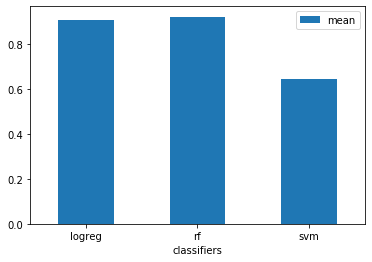

In [20]:
df = pd.DataFrame({'classifiers': ['logreg', 'rf', 'svm'], 'mean': [log_scores.mean().round(3), rf_scores.mean().round(3),svm_scores.mean().round(3)]})
ax = df.plot.bar(x='classifiers', y='mean', rot=0)
df.sort_values('mean', ascending=False)

In [47]:
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.feature_selection import VarianceThreshold, f_classif


def variance_threshold_on_df(df: pd.DataFrame, threshold=0):
    vt = VarianceThreshold(threshold)
    vt.fit(df.values)
    return df.iloc[:, vt.variances_ > threshold]

def feature_importance_anova(X,
                             y,
                             threshold=0.001,
                             correcting_multiple_hypotesis=True,
                             method='fdr_bh',
                             alpha=0.1,
                             sort_by='F'):
    '''
    Provide signifance for features in dataset with anova using multiple hypostesis testing
    :X: List of dict with key as feature names and values as features
    :y: Labels
    :threshold: Low-variens threshold to eliminate low varience features
    :correcting_multiple_hypotesis: corrects p-val with multiple hypotesis testing
    :method: method of multiple hypotesis testing
    :alpha: alpha of multiple hypotesis testing
    :sort_by: sorts output dataframe by pval or F
    :return: DataFrame with F and pval for each feature with their average values 
    '''
    df = variance_threshold_on_df(
        pd.DataFrame.from_records(X), threshold=threshold)

    F, pvals = f_classif(df.values, y)

    if correcting_multiple_hypotesis:
        _, pvals, _, _ = multipletests(pvals, alpha=alpha, method=method)

    df['labels'] = y
    df_mean = df.groupby('labels').mean().T

    df_mean['F'] = F
    df_mean['pval'] = pvals

    return df_mean.sort_values(sort_by, ascending=True)

In [48]:
df_pathways = feature_importance_anova(X_df.fillna(0), y)
df_pathways.head(10)

labels,bc,healthy,F,pval
Histidine metabolism,0.101254,9.616598e-11,0.000037,0.995139
Methionine and cysteine metabolism,17.285347,1.685737e+01,0.005051,0.956514
Fatty acid oxidation,11.769339,1.212642e+01,0.009130,0.949994
Vitamin C metabolism,0.438141,5.711981e-12,0.012948,0.948493
Hyaluronan metabolism,2.458166,5.437756e-11,0.019897,0.939434
Tyrosine metabolism,-0.077650,2.764699e-01,0.031593,0.922263
Nucleotide salvage pathway,11.917954,5.448030e-11,0.056285,0.885475
Oxidative phosphorylation,4.519792,1.553482e-10,0.072505,0.871560
Cysteine Metabolism,116.112557,9.843016e+01,0.138866,0.797141
Vitamin B2 metabolism,3.186711,1.251101e-10,0.151478,0.795606


,Unnamed: 0,Alanine and aspartate metabolism,Alkaloid synthesis,Aminosugar metabolism,Androgen and estrogen synthesis and metabolism,Arachidonic acid metabolism,Arginine and Proline Metabolism,Bile acid synthesis,Biotin metabolism,Blood group synthesis,...,"Valine, leucine, and isoleucine metabolism",Vitamin A metabolism,Vitamin B12 metabolism,Vitamin B2 metabolism,Vitamin B6 metabolism,Vitamin C metabolism,Vitamin D metabolism,Vitamin E metabolism,Xenobiotics metabolism,beta-Alanine metabolism
0,0,347.350721,-1.112827e-12,-66.583705,-0.098539,-2.321184e-12,-105.232068,-53.850349,-276.535927,8.323124e-13,...,175.228080,47.745535,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-3.425183e-13,-4.829319e-12,-89.138113
1,1,287.231674,-1.112827e-12,-2.067576,-0.098539,-2.292201e-12,-105.232068,-13.850349,556.797406,-5.194814e-12,...,28.886616,47.745535,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-4.596553e-13,-5.079632e-12,-89.138113
2,2,305.499834,-1.112827e-12,186.572694,-0.098539,9.397412e-12,48.614085,-18.713050,-276.535927,1.466358e-11,...,248.398811,45.918394,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-4.599230e-13,2.930244e-11,-74.430842
3,3,232.767388,-1.112827e-12,109.043535,-0.098539,-3.199579e-13,48.614085,1.260762,-276.535927,4.477827e-12,...,258.851773,47.745535,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-4.524963e-13,-4.334149e-12,-89.138113
4,4,326.517388,-1.112827e-12,-51.837162,-0.098539,-2.248090e-12,-105.232068,-11.907492,556.797406,1.574355e-13,...,341.720530,47.745535,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-4.534094e-13,-4.360381e-12,-89.138113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,201.517388,-1.112827e-12,182.194398,-0.098539,-1.095660e-12,151.178188,-7.006812,556.797406,-1.178350e-12,...,47.179299,34.232021,-2.345121e-12,19.888942,38.472034,-4.934211,-7.584181,-4.600504e-13,-5.107211e-12,-89.138113
210,210,14.017388,-1.112827e-12,-66.583705,-0.098539,-5.376208e-13,-98.619959,13.000708,-276.535927,-5.376681e-12,...,-0.137317,47.745535,-2.345121e-12,-56.353634,-52.437057,-4.934211,-3.723420,-1.860350e-13,-5.029315e-12,203.840596
211,211,129.161619,-1.112827e-12,-38.335497,-0.098539,-1.135138e-12,-105.232068,3.590676,556.797406,2.047222e-11,...,248.398811,58.894184,-2.345121e-12,-24.891278,-52.437057,-4.934211,1.036509,1.281759e-12,-1.289105e-12,37.945221
212,212,211.785245,-1.112827e-12,-49.993844,-0.098539,-2.471779e-13,151.178188,8.482984,-276.535927,-3.452931e-12,...,53.276860,34.232021,-2.345121e-12,19.888942,38.472034,57.565789,-7.584181,5.230202e-12,5.172408e-12,160.861887
